In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.shape

(7043, 21)

In [35]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
df["TotalCharges"].head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

In [40]:
## Data Cleaning

df.drop(["customerID"],axis=1,inplace=True)

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
# To convert the data type of TotalCharges column to numeric value instead of an object
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)

C:\Users\jayes\AppData\Local\Temp\ipykernel_1208\141977382.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)


In [43]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
# Binary encoding of target column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [45]:
categorical_columns = df.select_dtypes(include="object").columns.tolist()

In [46]:
type(categorical_columns)

list

In [47]:
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [48]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [49]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [50]:
# Splitting data into independant and depandent variables
X = df.drop('Churn', axis=1)
y = df['Churn']

In [51]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [52]:
X.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [53]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [54]:
# Splitting the datset into training and testing set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
# Applying standard scaling
from sklearn.preprocessing import StandardScaler

stdsclr = StandardScaler()

X_train_scaled = stdsclr.fit_transform(X_train)
X_test_scaled = stdsclr.transform(X_test)

In [56]:
X_train_scaled.shape,X_test_scaled.shape

((5634, 30), (1409, 30))

In [57]:
## model training and evalution
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled,y_train) ## model training

    # make predictions
    y_test_pred = model.predict(X_test_scaled) # prediciton for testing data
    y_train_pred = model.predict(X_train_scaled) # prediction for training data

    # training data performance metrix
    train_accuracy_score = accuracy_score(y_train,y_train_pred)
    train_f1_score = f1_score(y_train,y_train_pred,average="weighted")
    train_precision_score = precision_score(y_train,y_train_pred)
    train_recall_score = recall_score(y_train,y_train_pred)
    train_roc_auc_score = roc_auc_score(y_train,y_train_pred)

    # testing data performance metrix
    test_accuracy_score = accuracy_score(y_test,y_test_pred)
    test_f1_score = f1_score(y_test,y_test_pred,average="weighted")
    test_precision_score = precision_score(y_test,y_test_pred)
    test_recall_score = recall_score(y_test,y_test_pred)
    test_roc_auc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for training set")
    print("- Accuracy : {:.4f}".format(train_accuracy_score))
    print("- f1 score : {:.4f}".format(train_f1_score))
    print("- Precision score : {:.4f}".format(train_precision_score))
    print("- Recall score : {:.4f}".format(train_recall_score))
    print("- ROC AUC score : {:.4f}".format(train_roc_auc_score))

    print("---------------------------------------------------------")

    print("Model performance for testing set")
    print("- Accuracy : {:.4f}".format(test_accuracy_score))
    print("- f1 score : {:.4f}".format(test_f1_score))
    print("- Precision score : {:.4f}".format(test_precision_score))
    print("- Recall score : {:.4f}".format(test_recall_score))
    print("- ROC AUC score : {:.4f}".format(test_roc_auc_score))

    print("="*35)
    print("\n")

LogisticRegression
Model performance for training set
- Accuracy : 0.8030
- f1 score : 0.7966
- Precision score : 0.6561
- Recall score : 0.5421
- ROC AUC score : 0.7197
---------------------------------------------------------
Model performance for testing set
- Accuracy : 0.8197
- f1 score : 0.8156
- Precision score : 0.6831
- Recall score : 0.5952
- ROC AUC score : 0.7479


RandomForestClassifier
Model performance for training set
- Accuracy : 0.9986
- f1 score : 0.9986
- Precision score : 0.9973
- Recall score : 0.9973
- ROC AUC score : 0.9982
---------------------------------------------------------
Model performance for testing set
- Accuracy : 0.7857
- f1 score : 0.7722
- Precision score : 0.6360
- Recall score : 0.4450
- ROC AUC score : 0.6767




In [58]:
## Hyper parameter tunning with both the models

from sklearn.model_selection import GridSearchCV,StratifiedKFold

model  = LogisticRegression()

cv = StratifiedKFold()

random_forest_params = {
    "max_depth" : [5,8,10,15,None],
    "max_features" : [5,7,"auto", "8"],
    "min_samples_split" : [2,8,15,20],
    "n_estimators" : [100,200,500,1000]
}

logistic_regression_params = {
    "penalty" : ["l1", "l2", "elasticnet"],
    "C": [1.0,0.1,10,100,0.001],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

grid_cv_models = [
    ("RF",RandomForestClassifier(),random_forest_params),
    ("LOGREG",LogisticRegression(),logistic_regression_params)
]


model_params = {}

for name,model,params in grid_cv_models:
    grid = GridSearchCV(estimator=model,param_grid=params,scoring="accuracy",cv=cv,verbose=2,n_jobs=-1)
    grid.fit(X_train_scaled,y_train)
    model_params[name] = grid.best_params_

for model_name in model_params:
    print(f"-----------best params for {model_name}----------")
    print(model_params[model_name])

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
800 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
237 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jayes\anaconda3\Lib\site-packa

Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver =

-----------best params for RF----------
{'max_depth': 10, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 1000}
-----------best params for LOGREG----------
{'C': 100, 'penalty': 'l1', 'solver': 'saga'}


c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [59]:
## training models with best params

models = {
    "LogisticRegression": LogisticRegression(C= 100, penalty= "l2", solver= "saga"),
    "RandomForestClassifier": RandomForestClassifier(max_depth=15, max_features= 5, min_samples_split= 20, n_estimators= 200)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled,y_train) ## model training

    # make predictions
    y_test_pred = model.predict(X_test_scaled) # prediciton for testing data
    y_train_pred = model.predict(X_train_scaled) # prediction for training data

    # training data performance metrix
    train_accuracy_score = accuracy_score(y_train,y_train_pred)
    train_f1_score = f1_score(y_train,y_train_pred,average="weighted")
    train_precision_score = precision_score(y_train,y_train_pred)
    train_recall_score = recall_score(y_train,y_train_pred)
    train_roc_auc_score = roc_auc_score(y_train,y_train_pred)

    # testing data performance metrix
    test_accuracy_score = accuracy_score(y_test,y_test_pred)
    test_f1_score = f1_score(y_test,y_test_pred,average="weighted")
    test_precision_score = precision_score(y_test,y_test_pred)
    test_recall_score = recall_score(y_test,y_test_pred)
    test_roc_auc_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for training set")
    print("- Accuracy : {:.4f}".format(train_accuracy_score))
    print("- f1 score : {:.4f}".format(train_f1_score))
    print("- Precision score : {:.4f}".format(train_precision_score))
    print("- Recall score : {:.4f}".format(train_recall_score))
    print("- ROC AUC score : {:.4f}".format(train_roc_auc_score))

    print("---------------------------------------------------------")

    print("Model performance for testing set")
    print("- Accuracy : {:.4f}".format(test_accuracy_score))
    print("- f1 score : {:.4f}".format(test_f1_score))
    print("- Precision score : {:.4f}".format(test_precision_score))
    print("- Recall score : {:.4f}".format(test_recall_score))
    print("- ROC AUC score : {:.4f}".format(test_roc_auc_score))

    print("="*35)
    print("\n")

c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression
Model performance for training set
- Accuracy : 0.8023
- f1 score : 0.7958
- Precision score : 0.6550
- Recall score : 0.5394
- ROC AUC score : 0.7184
---------------------------------------------------------
Model performance for testing set
- Accuracy : 0.8190
- f1 score : 0.8147
- Precision score : 0.6821
- Recall score : 0.5925
- ROC AUC score : 0.7465


RandomForestClassifier
Model performance for training set
- Accuracy : 0.8537
- f1 score : 0.8461
- Precision score : 0.8032
- Recall score : 0.5949
- ROC AUC score : 0.7711
---------------------------------------------------------
Model performance for testing set
- Accuracy : 0.8119
- f1 score : 0.8018
- Precision score : 0.6971
- Recall score : 0.5121
- ROC AUC score : 0.7160




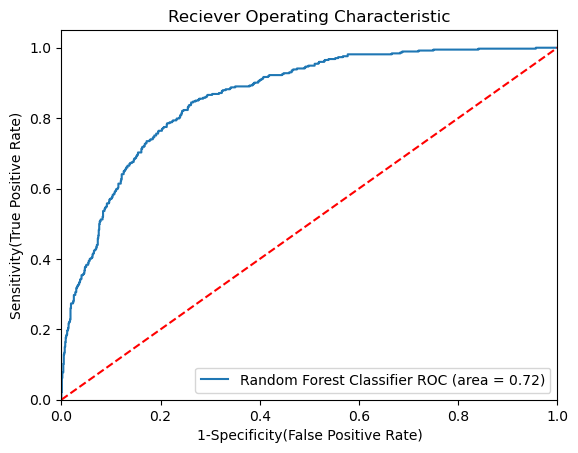

In [60]:
# plot the ROC AUC curve Random Forest
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure()

# add the models to the list that you want to view on the roc plot

auc_models = [
    {
        "label" : "Random Forest Classifier",
        "model" : RandomForestClassifier(max_depth=15, max_features= 5, min_samples_split= 20, n_estimators= 200),
        "auc" : 0.7205
    }
]

# create loop through all model
for algo in auc_models:
    model = algo["model"] # select the model
    model.fit(X_train,y_train) # train the model

    # compute false positive rate and true positive rate
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

    # calculate area under the curve to display on the plot
    plt.plot(fpr,tpr, label="%s ROC (area = %0.2f)" % (algo["label"],algo["auc"]))

    # custom setting for the plot
    plt.plot([0,1],[0,1],"r--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("1-Specificity(False Positive Rate)")
    plt.ylabel("Sensitivity(True Positive Rate)")
    plt.title("Reciever Operating Characteristic")
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()

c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


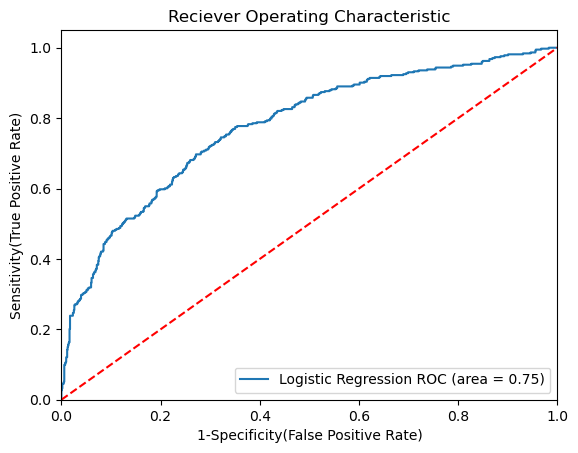

In [61]:
# plot the ROC AUC curve Logistic Regression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure()

# add the models to the list that you want to view on the roc plot

auc_models = [
    {
        "label" : "Logistic Regression",
        "model" : LogisticRegression(C= 100, penalty= "l2", solver= "saga"),
        "auc" : 0.7465
    }
]

# create loop through all model
for algo in auc_models:
    model = algo["model"] # select the model
    model.fit(X_train,y_train) # train the model

    # compute false positive rate and true positive rate
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

    # calculate area under the curve to display on the plot
    plt.plot(fpr,tpr, label="%s ROC (area = %0.2f)" % (algo["label"],algo["auc"]))

    # custom setting for the plot
    plt.plot([0,1],[0,1],"r--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("1-Specificity(False Positive Rate)")
    plt.ylabel("Sensitivity(True Positive Rate)")
    plt.title("Reciever Operating Characteristic")
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()

c:\Users\jayes\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


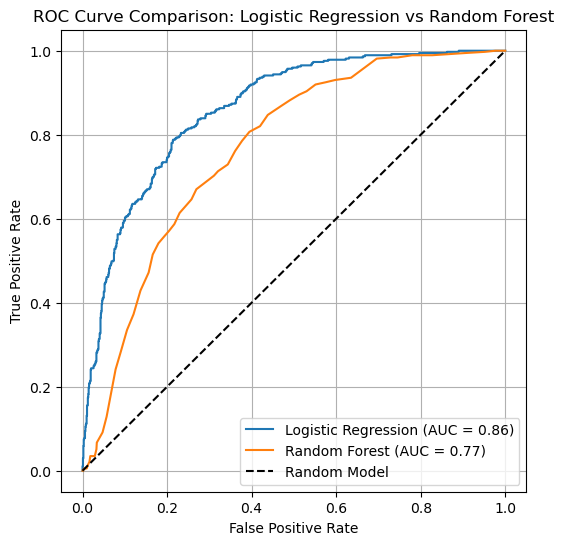

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, thresholds = roc_curve(y_test, log_probs)
roc_auc_log = auc(fpr_log, tpr_log)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves
plt.figure(figsize=(6, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression vs Random Forest')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
X_train_scaled.shape

(5634, 30)

In [64]:
X_test_scaled.shape

(1409, 30)